<a href="https://colab.research.google.com/github/venkatesh762004/ML_EXPERIMENTS/blob/main/ML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4. **Exercises to solve the real-world problems using the following machine learning methods: a) Linear Regression b) Logistic Regression c) Binary Classifier**

Linear Regression in Machine Learning :

Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

Mean Squared Error: 2.524354896707238e-29
R-squared: 1.0


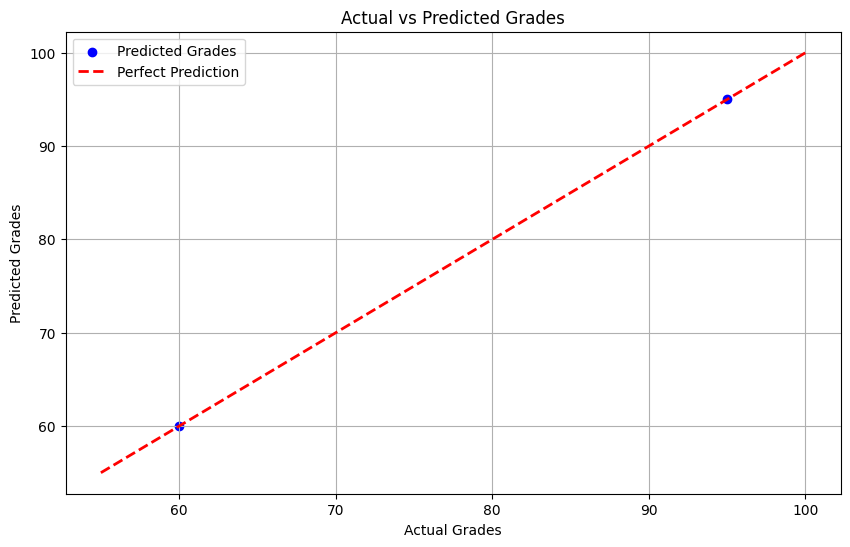

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a synthetic dataset
data = {
    'Study_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Attendance': [60, 70, 75, 80, 85, 90, 95, 100, 100, 100],
    'Grades': [55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
}

df = pd.DataFrame(data)

# Define features (X) and target variable (y)
X = df[['Study_Hours', 'Attendance']]
y = df['Grades']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted Grades
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Grades')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.legend()
plt.grid()
plt.show()

**Logistic regression:** It is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Logistic regression is a statistical algorithm which analyze the relationship between two data factors. The article explores the fundamentals of logistic regression, it’s types and implementations.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).


**Logistic Function (Sigmoid Function):**

The sigmoid function is a mathematical function used to map the predicted values to probabilities.

It maps any real value into another value within a range of 0 and 1.

The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the "S" form. The S-form curve is called the Sigmoid function or the logistic function.

In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.

**Logistic** **Regression**

   Hours_Studied  Exam_Score  Passed
0       3.745401   38.324483       0
1       9.507143   92.081357       1
2       7.319939   74.117002       1
3       5.986585   39.990159       0
4       1.560186   13.405145       0
Confusion Matrix:
 [[16  0]
 [ 0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


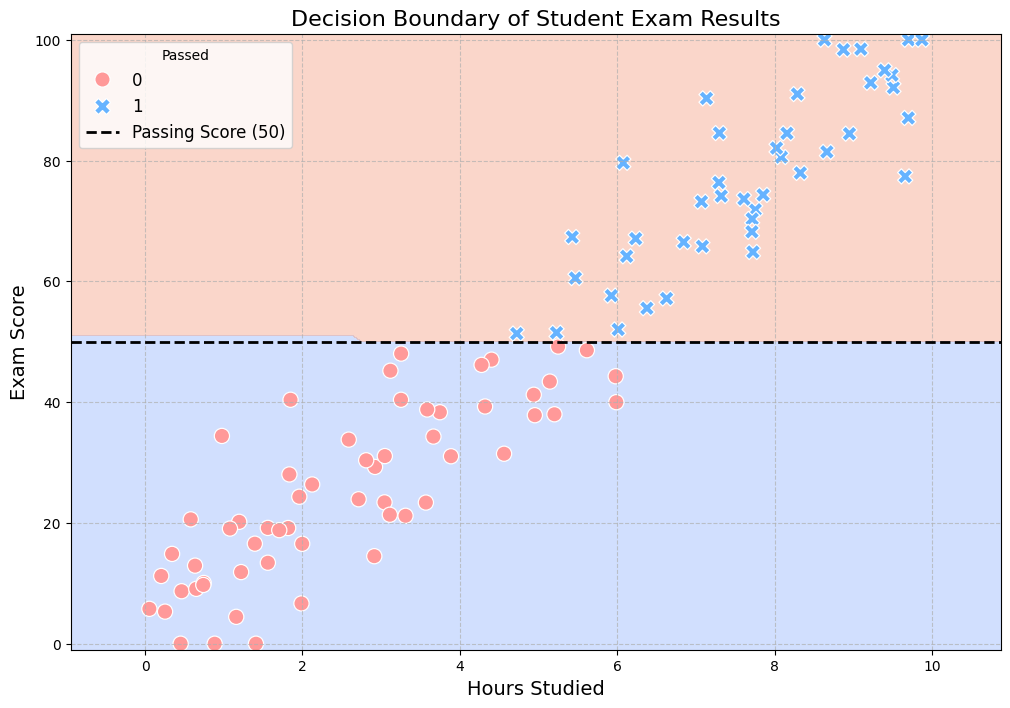

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Generating a synthetic dataset
np.random.seed(42)
n_samples = 100
hours_studied = np.random.uniform(0, 10, n_samples)  # Random hours studied between 0 and 10
exam_scores = (hours_studied * 10 + np.random.normal(0, 10, n_samples)).clip(0, 100)  # Exam scores based on study hours with some noise
passed = (exam_scores >= 50).astype(int)  # Pass if exam score is 50 or higher

# Creating a DataFrame
data = pd.DataFrame({
    'Hours_Studied': hours_studied,
    'Exam_Score': exam_scores,
    'Passed': passed
})

# Display the first few rows of the dataset
print(data.head())

# Splitting the data into features and target variable
X = data[['Hours_Studied', 'Exam_Score']]
y = data['Passed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualizing the results with a different style
plt.figure(figsize=(12, 8))

# Creating a mesh grid for contour plotting
x_min, x_max = X['Hours_Studied'].min() - 1, X['Hours_Studied'].max() + 1
y_min, y_max = X['Exam_Score'].min() - 1, X['Exam_Score'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict probabilities for the mesh grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm', levels=np.linspace(-0.1, 1.1, 3))
sns.scatterplot(data=data, x='Hours_Studied', y='Exam_Score', hue='Passed', style='Passed', s=120, palette=['#FF9999', '#66B3FF'], markers=['o', 'X'])
plt.axhline(y=50, color='black', linestyle='--', linewidth=2, label='Passing Score (50)')
plt.title('Decision Boundary of Student Exam Results', fontsize=16)
plt.xlabel('Hours Studied', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)
plt.legend(title='Passed', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



**Binary Classifier**
Binary Classification is a type of machine learning algorithm used to classify data into one of two categories. It predicts a binary outcome, where the result can either be positive or negative. For example, binary classification can be used to predict if a customer will buy a product or not, or if an email is spam or not.

        Age  Blood Pressure  Disease
0  1.300227       -0.785654        1
1  1.441844       -0.560086        1
2 -0.847924       -1.366213        0
3 -0.722150       -1.411294        0
4 -1.272215        0.259451        0
Confusion Matrix:
 [[15  0]
 [ 0 15]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



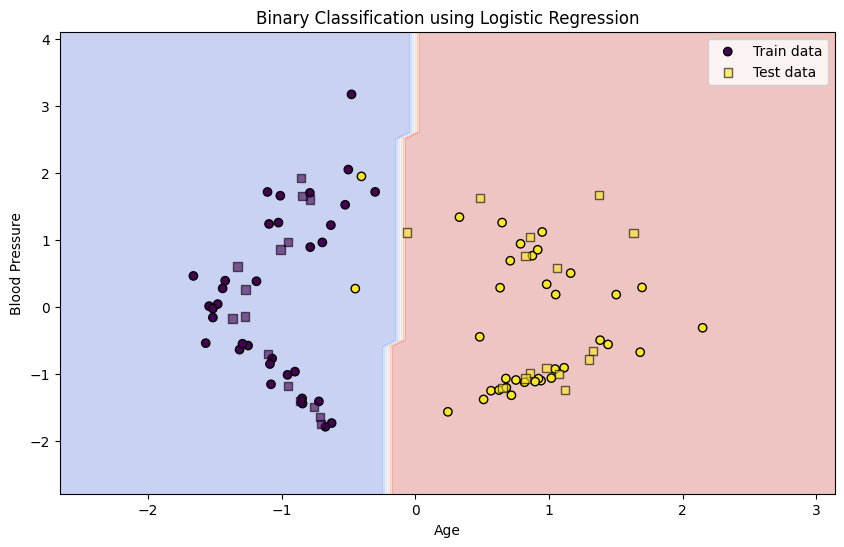

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=1)

# Convert to DataFrame for easier handling
data = pd.DataFrame(X, columns=['Age', 'Blood Pressure'])
data['Disease'] = y

# Display the first few rows
print(data.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class labels for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Train data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label='Test data', alpha=0.6)
plt.title('Binary Classification using Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()